# **Employee Data (US)**
> this dataset is downloaded from kaggle 

linkedin : https:/www.linkedin.com/in/ahad-moen


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### **Reading Data** from file and testing

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
emp_df = pd.read_csv('project/employee/employee_data.csv', index_col = 'ID')

In [19]:
emp_df.head(5)

,Gender,Experience (Years),Position,Salary
ID,,,,
1,F,4,DevOps Engineer,109976
2,M,6,DevOps Engineer,120088
3,M,17,Web Developer,181301
4,M,7,Systems Administrator,77530
5,F,13,Systems Administrator,152397


<div class='alert alert-block alert-success'>
    <b>Success</b>: This box indicates a successful action.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Getting overview of Data


In [752]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              400 non-null    object
 1   Experience (Years)  400 non-null    int64 
 2   Position            400 non-null    object
 3   Salary              400 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.8+ KB


In [35]:
emp_df.describe()

,Experience (Years),Salary
count,400.000000,400.00000
mean,9.670000,131701.19750
std,6.101571,43351.50899
min,0.000000,43643.00000
25%,4.000000,100484.75000
50%,10.000000,128561.50000
75%,15.000000,157735.00000
max,20.000000,269950.00000


In [39]:
131701.19750+43351.50899

175052.70649

From info() we can see there is no missing data in our dataset and describe tell about basicality of Data.
> ##### **Experience:**  
mean is **9.5** and by std we can conclude we have emp of mostly **3 years to 15 year exp**.
> ##### **Salary:** 
mean **131701** and by std we can conclude we have emp of mostly **88349 to 175052 salaries emp**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### **Indentifying Outliers**

**we removes the outliers, as mean really affected by outlieaars for further calculations**

In [70]:
print(emp_df.columns)

Index(['Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')


In [66]:
emp_df.columns = emp_df.columns.str.strip()


In [153]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Experience (Years) Boxplot')

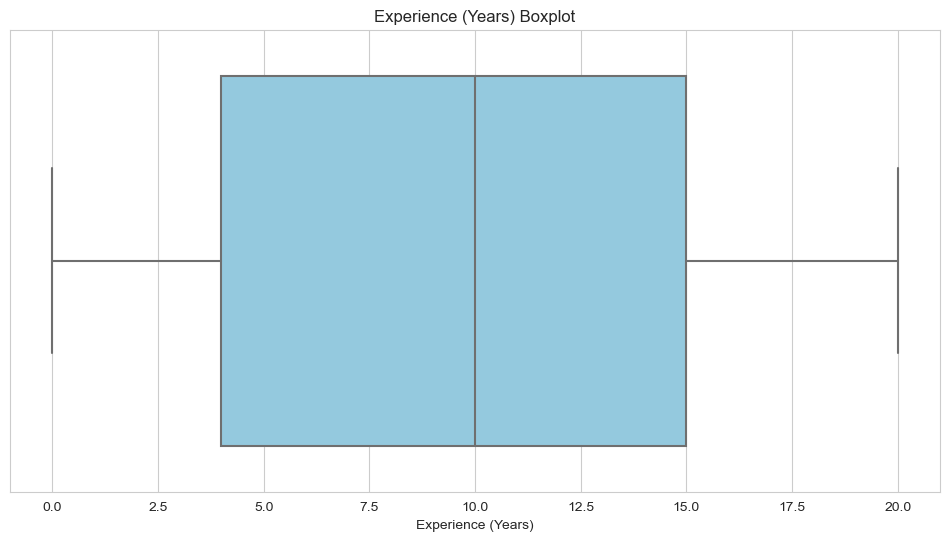

In [610]:
plt.figure(figsize=(12,6))
sns.boxplot(x = emp_df['Experience (Years)'], color ='skyblue').set_title('Experience (Years) Boxplot')

Text(0.5, 1.0, 'Salary Boxplot Before Removing Outlier')

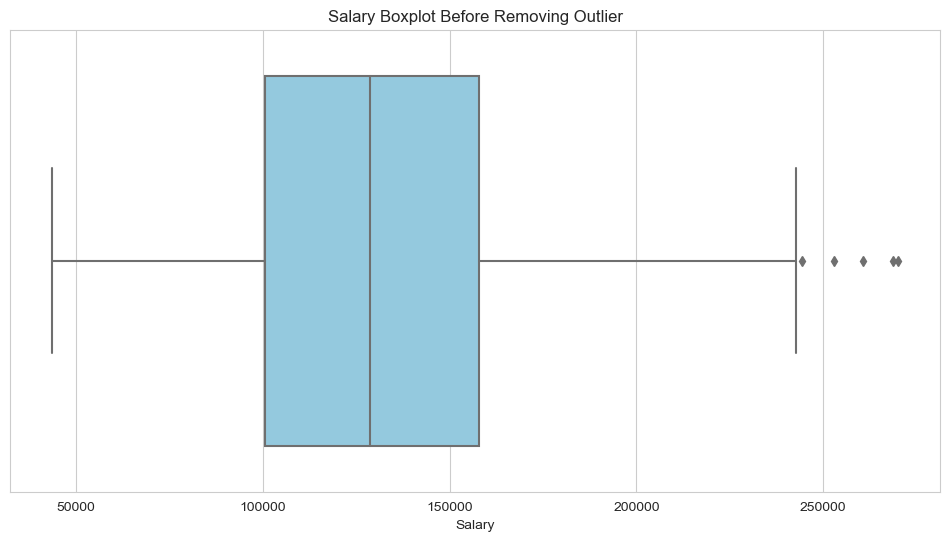

In [608]:
plt.figure(figsize=(12,6))
sns.boxplot(x = emp_df['Salary'],color ='skyblue').set_title('Salary Boxplot Before Removing Outlier')

**from the boxplot we conclude that,** 
> #### **Experience:** have no outliers
> #### **Salary:** have apperently **5 outliers**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Data Cleaning


**Extracting Outliers**

In [197]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = emp_df['Salary'].quantile(0.25)
Q3 = emp_df['Salary'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1


upper_bound = Q3 + 1.4 * IQR

> The commonly use multiplier is 1.5, but as analyzing our need i adjust the multiplier to 1.4 for removing outliers

In [702]:
emp_df[emp_df['Salary'] >= upper_bound].sort_values(by = 'Salary')

,Gender,Experience (Years),Position,Salary
ID,,,,
318,M,18,Cloud Solutions Architect,242808
348,F,19,DevOps Engineer,242819
162,M,17,IT Manager,244446
260,M,14,Cloud Solutions Architect,252949
62,M,17,IT Manager,260594
121,F,18,IT Manager,268774
116,M,18,IT Manager,269950


In [850]:
filtered_emp_df = emp_df[emp_df['Salary'] <= upper_bound]

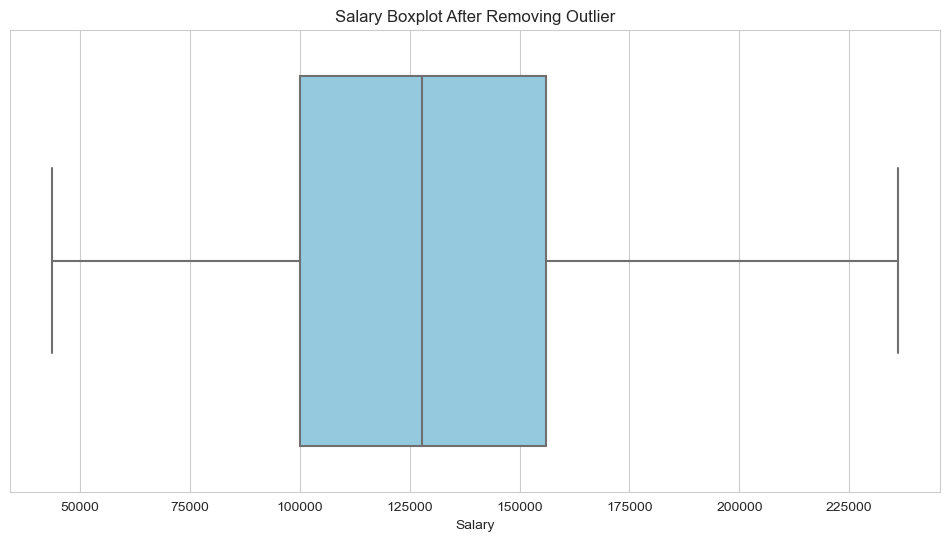

In [606]:
plt.figure(figsize=(12,6))
plot = sns.boxplot(x = filtered_emp_df['Salary'], color ='skyblue').set_title('Salary Boxplot After Removing Outlier')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Extracting EMP base on salaries

 **Employees that have higher salaries**

In [350]:
higher_pay_emp = filtered_emp_df[filtered_emp_df['Salary'] >= 200000]

In [352]:
higher_pay_emp

,Gender,Experience (Years),Position,Salary
ID,,,,
22,F,19,IT Security Analyst,232972
24,F,13,IT Manager,235235
71,F,19,Cloud Solutions Architect,226461
97,F,12,IT Manager,207518
108,M,14,IT Manager,205579
117,M,16,DevOps Engineer,214282
120,F,17,DevOps Engineer,230965
124,M,18,Software Engineer,215034
145,M,12,Cloud Solutions Architect,217422


**Highest Male Salary**

In [329]:
filtered_male_df = filtered_emp_df[[ 'Gender', 'Salary']][filtered_emp_df['Gender'] == 'M']

# Find the highest salary among males
highest_male_sal = filtered_male_df['Salary'].max()

print("Highest salary among males:", highest_male_sal)

Highest salary among males: 229450


**Lowest Male Salary**

In [377]:
filtered_male_df = filtered_emp_df[[ 'Gender', 'Salary']][filtered_emp_df['Gender'] == 'M']

lowest_male_sal = filtered_male_df['Salary'].min()

print("Lowest salary among males:", lowest_male_sal)

Lowest salary among males: 48710


**Highest Female Salary**

In [333]:
filtered_female_df = filtered_emp_df[[ 'Gender', 'Salary']][filtered_emp_df['Gender'] == 'F']

# Find the highest salary among females
highest_female_sal = filtered_female_df['Salary'].max()

print("Highest salary among males:", highest_female_sal)

Highest salary among males: 236045


**Lowest Female Salary**

In [380]:
filtered_female_df = filtered_emp_df[[ 'Gender', 'Salary']][filtered_emp_df['Gender'] == 'F']

lowest_female_sal = filtered_female_df['Salary'].min()

print("Lowest salary among males:", lowest_female_sal)

Lowest salary among males: 43643


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dependency Salary increment on Experience

In [365]:
filtered_emp_df['Experience (Years)'].corr( filtered_emp_df['Salary'])

0.6093419374642316

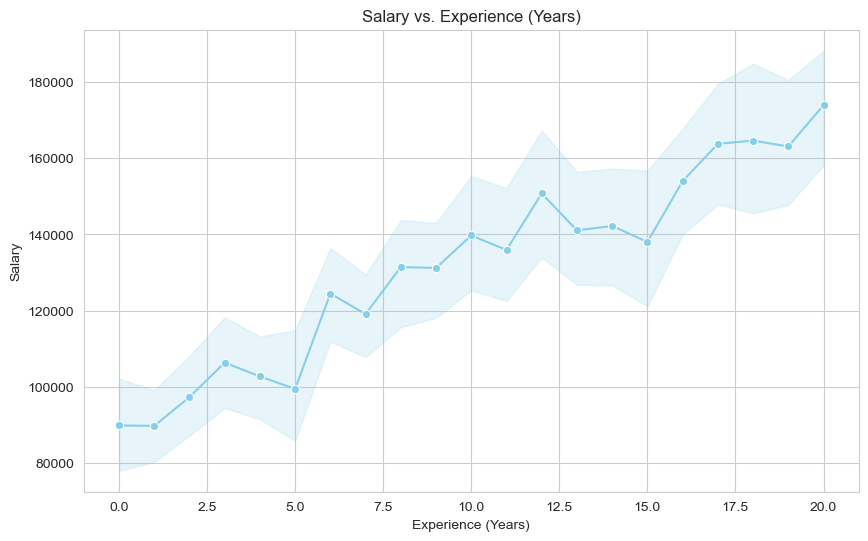

In [566]:
df_sorted = filtered_emp_df.sort_values(by='Experience (Years)')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='Experience (Years)', y='Salary', marker='o', color='skyblue')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Salary vs. Experience (Years)')
plt.grid(True)
plt.show()

**it shows salary increases by as experience increase**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Grouping Data for Position Analysis

In [273]:
salary_distribution = filtered_emp_df.groupby('Position')['Salary'].describe()

In [275]:
salary_distribution

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
Cloud Solutions Architect,28.0,154624.714286,40511.614561,92288.0,127063.75,147967.0,177814.75,236045.0
Database Administrator (DBA),38.0,132864.552632,32989.308937,67396.0,108245.00,131083.5,153582.50,214420.0
DevOps Engineer,36.0,159610.194444,35984.341332,103940.0,131318.25,155968.5,184978.25,230965.0
IT Manager,36.0,160686.055556,34198.249200,87871.0,145854.00,159398.5,187227.25,235235.0
IT Security Analyst,39.0,134440.820513,38863.676876,70591.0,110864.50,129205.0,153531.00,232972.0
IT Support Specialist,31.0,87683.806452,24455.386067,43643.0,69931.50,90049.0,102239.50,136355.0
Network Administrator,31.0,116865.064516,30385.225368,61605.0,93233.00,116964.0,138534.00,181654.0
Software Engineer,36.0,131357.416667,38248.092780,66956.0,99886.75,132678.5,162473.25,215034.0
Systems Administrator,38.0,113117.447368,32081.497420,55964.0,94392.00,112383.5,131496.50,190672.0


**by this we can conclude man things**
> **the most employees are web developers**.

> **the most salary varies in Cloud Solutions Architect**

> **IT Managers have highest it concludes that as we removed outliers so IT managers gettting paid more we will check it below**

In [586]:
salary_max_position = round(filtered_emp_df.groupby('Position')['Salary'].mean())
salary_max_position_df = salary_max_position.reset_index()
salary_max_position_df.sort_values(by='Salary')

,Position,Salary
5,IT Support Specialist,87684.0
10,Web Developer,108238.0
8,Systems Administrator,113117.0
6,Network Administrator,116865.0
9,Systems Analyst,127658.0
7,Software Engineer,131357.0
1,Database Administrator (DBA),132865.0
4,IT Security Analyst,134441.0
0,Cloud Solutions Architect,154625.0
2,DevOps Engineer,159610.0


**by this we are sure that the max salary is taken IT managers**

In [477]:
Avg_Sal_byPosition = filtered_emp_df.groupby('Position')['Salary'].mean()

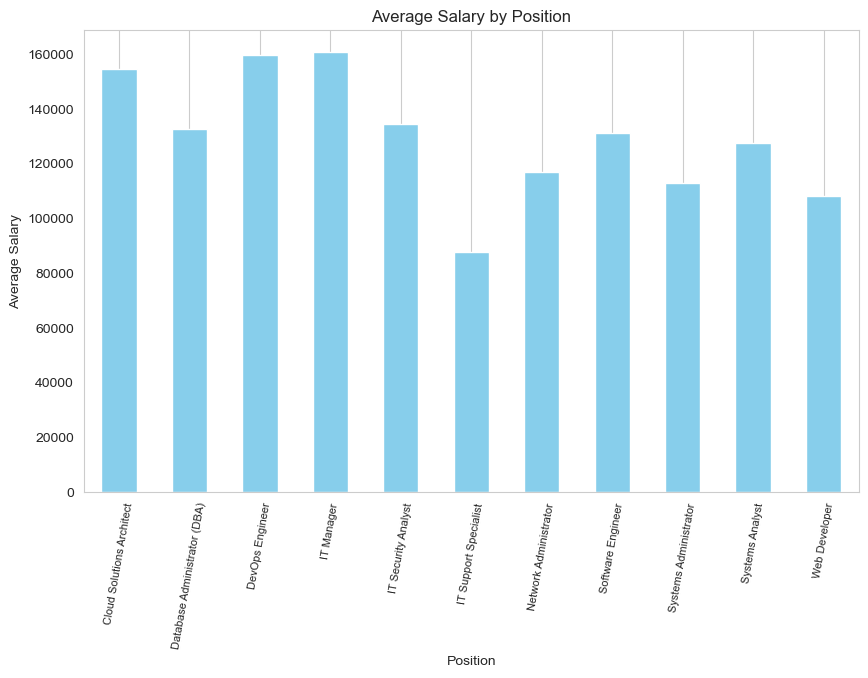

In [511]:
plt.figure(figsize=(10, 6))
Avg_Sal_byPosition.plot(kind='bar', color='skyblue')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.title('Average Salary by Position')
plt.xticks(rotation=80)
plt.xticks(fontsize=8)
plt.grid(axis='y')
plt.show()


In [706]:
Avg_Sal_byGender = filtered_emp_df.groupby('Gender')['Salary'].mean()
Avg_Sal_byGender_df = Avg_Sal_byGender.reset_index()
Avg_Sal_byGender_df

,Gender,Salary
0,F,131373.173469
1,M,127659.883249


In [712]:
Avg_Exp_worker = filtered_emp_df.groupby('Gender')['Experience (Years)'].mean()

In [714]:
Avg_Exp_worker

Gender
F    9.678571
M    9.390863
Name: Experience (Years), dtype: float64

**It is good that both Man and Women almost getting same pay**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### **Seperating Employees by Experience**

In [794]:
total_empployees = filtered_emp_df['Salary'].count()
# filtered_emp_df['Experience (Years)'].count()
total_empployees

393

In [798]:
experienced_emps = filtered_emp_df[filtered_emp_df['Experience (Years)'] >= 15]
experienced_emps

,Gender,Experience (Years),Position,Salary
ID,,,,
3,M,17,Web Developer,181301
11,F,19,Network Administrator,158856
13,F,16,Database Administrator (DBA),137662
18,F,16,Database Administrator (DBA),188681
21,F,20,Network Administrator,139766
...,...,...,...,...
379,M,20,IT Manager,190956
380,F,16,Systems Analyst,149281
396,F,19,Cloud Solutions Architect,236045


**so we have 98 employer out of 393 employeer who have more experience than 15 year**

In [801]:
unexperienced_emps = filtered_emp_df[filtered_emp_df['Experience (Years)'] <= 5]
unexperienced_emps

,Gender,Experience (Years),Position,Salary
ID,,,,
1,F,4,DevOps Engineer,109976
8,M,2,DevOps Engineer,111494
12,M,2,DevOps Engineer,103940
17,M,4,IT Security Analyst,111156
19,F,5,IT Security Analyst,129205
...,...,...,...,...
389,F,4,Systems Administrator,102856
392,F,3,Cloud Solutions Architect,159870
393,F,1,Network Administrator,79333


**126 employeer have less than 5 year of experience**

In [805]:
midExp_emps = filtered_emp_df[(filtered_emp_df['Experience (Years)'] > 5) & (filtered_emp_df['Experience (Years)'] < 15)]
midExp_emps

,Gender,Experience (Years),Position,Salary
ID,,,,
2,M,6,DevOps Engineer,120088
4,M,7,Systems Administrator,77530
5,F,13,Systems Administrator,152397
6,F,13,Web Developer,114998
7,F,11,Systems Administrator,82328
...,...,...,...,...
385,F,14,Systems Administrator,108497
390,F,9,IT Security Analyst,107445
391,M,11,IT Support Specialist,66076


**169 employees have more than 5 year of experiance and less than 15 year of experience**

In [820]:
print('Total employees is', experienced_emps['Experience (Years)'].count() + midExp_emps['Experience (Years)'].count() + 
unexperienced_emps['Experience (Years)'].count())

Total employees is 393


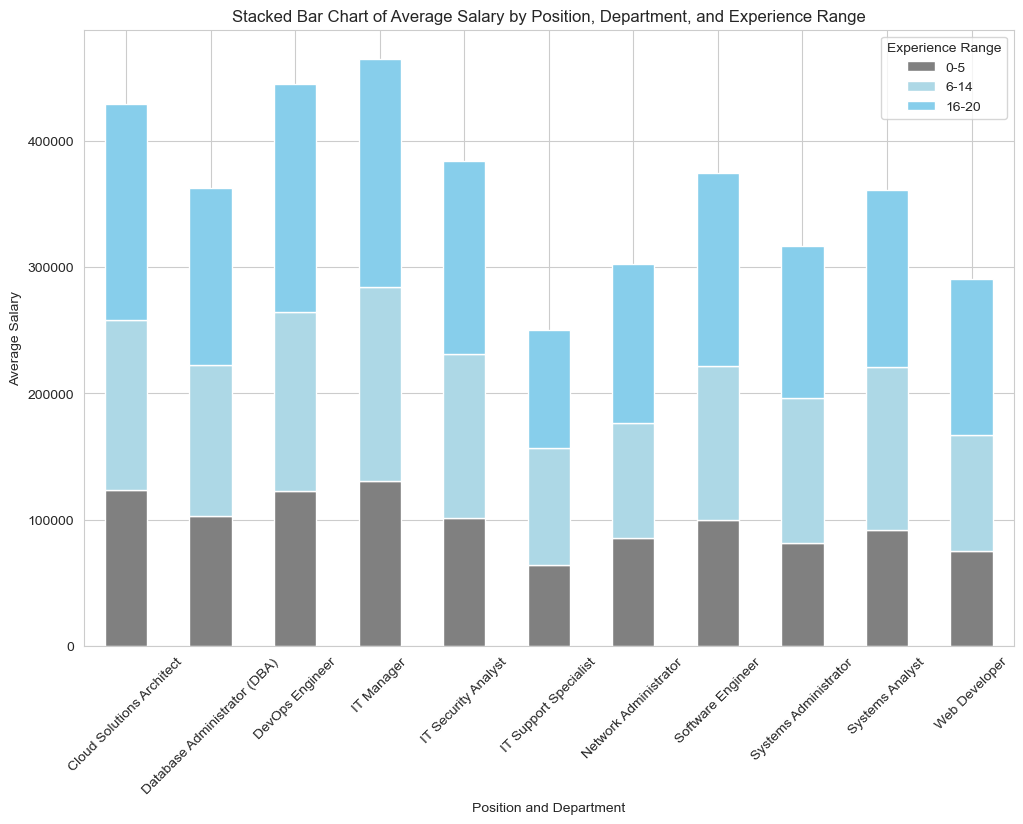

In [895]:
# Define bins for experience ranges
bins = [0, 5, 10, 15]
labels = ['0-5', '6-14', '16-20']

# Make a copy of the DataFrame to avoid SettingWithCopyWarning
df_copy = filtered_emp_df.copy()

# Assign experience ranges
df_copy['Experience Range'] = pd.cut(df_copy['Experience (Years)'], bins=bins, labels=labels, right=False)

# Calculate average salary for each combination of Position, Department, and Experience Range
avg_salary_df = df_copy.groupby(['Position', 'Experience Range'])['Salary'].mean().unstack(level='Experience Range')

# Plot stacked bar chart
avg_salary_df.plot(kind='bar', stacked=True, figsize=(12, 8),
                   color=['grey', 'lightblue','skyblue'])


plt.xlabel('Position and Department')
plt.ylabel('Average Salary')
plt.title('Stacked Bar Chart of Average Salary by Position, Department, and Experience Range')
plt.xticks(rotation=45)
plt.legend(title='Experience Range')
plt.show()

**so it shows more experience employees have more higher mean salaries that show salaries increased by experiences**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Conclusion


> IT managers and Dev OPs Engineers are taking more salaries, or as we have more web developer in less salaries so it show web developers are less expensive to company, and we have almost equal ratios of men and women who are working here, and with expereince employees salaries are increasing, **for further decision we need revenues of postions to judge where we have to do focuds more**